In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy
import scipy
from scipy.stats import bernoulli
from copy import deepcopy
from tqdm import tqdm

In [4]:
import params
import monte_carlo
import mean_field_agent

## Case 1: Repeated interaction of two agents, where the second is infected 

In [194]:
# Number of agents
params.N = 2
# Number of interactions
params.M = 100
# Transmission probability ~ R0/number of interactions while infectious, what constitutes an interaction? closer than 2m for 2minutes indoors? but touching objects ...
params.prob_trans = 0.05 # R0=2/40 interactions 
params.prob_infection_t0 = 0.01
params.num_samples = 999

In [202]:
mc = monte_carlo.MonteCarlo()

In [203]:
mc.I0[:,0]=0
mc.I0[:,1]=1
mc.reset()

In [204]:
mc.interactions;

In [205]:
PI, P_samples = mc.run()

100%|██████████| 100/100 [00:00<00:00, 2840.86it/s]


In [199]:
a = mean_field_agent.Agent(id=0)
b = mean_field_agent.Agent(id=1)
a.p = 0.
b.p = 1.

In [200]:
mf_PI = []
for i in tqdm(range(params.M)):
    
    msg_a, msg_b = mean_field_agent.start_contact(a,b)    
    # -------
    # Contact ends, and we can compute context & t_exposed
    context = mean_field_agent.ContextObject(t_exposed=0)
    # -------
    mean_field_agent.end_contact(a, b, msg_a, msg_b, context)   

    mf_PI.append([a.p, b.p])
mf_PI = numpy.array(mf_PI)
    

100%|██████████| 100/100 [00:00<00:00, 142131.62it/s]


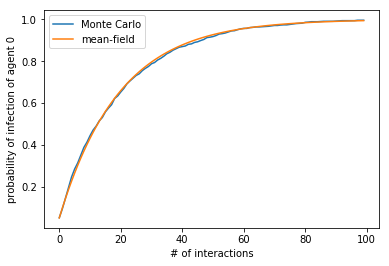

In [207]:
plt.plot(PI[:,0], label="Monte Carlo")
plt.plot(mf_PI[:,0], label="mean-field")
plt.xlabel("# of interactions")
plt.ylabel("probability of infection of agent 0")
plt.legend()

## Case 2: Intermingling contacts with other agents, without sharing of histories

In [273]:
# Number of agents
params.N = 5
# Number of interactions
params.M = 7
params.num_samples = 999

In [274]:
mc = monte_carlo.MonteCarlo()

In [275]:
mc.interactions = numpy.array([[0,1], [1,2], [0,1], [0,3], [0,1], [1,4], [0,1]])

In [276]:
mc.interactions

array([[0, 1],
       [1, 2],
       [0, 1],
       [0, 3],
       [0, 1],
       [1, 4],
       [0, 1]])

In [282]:
mc.I0[:,0]=0
mc.I0[:,1]=1
mc.I0[:,2]=0
mc.I0[:,3]=1
mc.I0[:,4]=0
mc.reset()

In [283]:
PI, P_samples = mc.run()

100%|██████████| 7/7 [00:00<00:00, 2885.23it/s]


In [279]:
agents = [mean_field_agent.Agent(id=i) for i in range(params.N)]
for i in range(0,params.N):
    agents[i].p = 1.
agents[0].p = 0.
agents[2].p = 0.
agents[4].p = 0.

In [280]:
mf_PI = []
for i1, i2 in tqdm(mc.interactions):
    a = agents[i1]
    b = agents[i2]
    
    msg_a, msg_b = mean_field_agent.start_contact(a, b)    
    # -------
    # Contact ends, and we can compute context & t_exposed
    context = mean_field_agent.ContextObject(t_exposed=0)
    # -------
    mean_field_agent.end_contact(a, b, msg_a, msg_b, context)   

    mf_PI.append([x.p for x in agents])
mf_PI = numpy.array(mf_PI)

100%|██████████| 7/7 [00:00<00:00, 23947.90it/s]


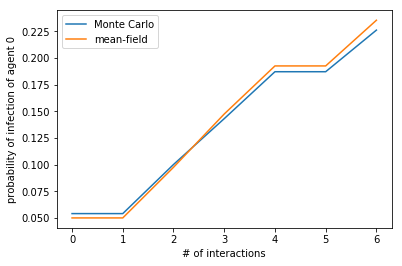

In [284]:
plt.plot(PI[:,0], label="Monte Carlo")
plt.plot(mf_PI[:,0], label="mean-field")
plt.xlabel("# of interactions")
plt.ylabel("probability of infection of agent 0")
plt.legend()

## Case 3: Intermingling contacts with other agents, with sharing of histories

In [287]:
# Number of agents
params.N = 5
# Number of interactions
params.M = 11
params.num_samples = 999

In [288]:
mc = monte_carlo.MonteCarlo()

In [289]:
mc.interactions = numpy.array([[0,1], [1,2], [0,2], [0,1], [2,4], [1,4], [0,1], [0,3], [0,1], [0,4], [0,1]])

In [290]:
mc.interactions

array([[0, 1],
       [1, 2],
       [0, 2],
       [0, 1],
       [2, 4],
       [1, 4],
       [0, 1],
       [0, 3],
       [0, 1],
       [0, 4],
       [0, 1]])

In [296]:
mc.I0[:,0]=0
mc.I0[:,1]=1
mc.I0[:,2]=0
mc.I0[:,3]=1
mc.I0[:,4]=0
mc.reset()

In [297]:
PI, P_samples = mc.run()

100%|██████████| 11/11 [00:00<00:00, 1852.31it/s]


In [293]:
agents = [mean_field_agent.Agent(id=i) for i in range(params.N)]
for i in range(0,params.N):
    agents[i].p = 1.
agents[0].p = 0.
agents[2].p = 0.
agents[4].p = 0.

In [294]:
mf_PI = []
for i1, i2 in tqdm(mc.interactions):
    a = agents[i1]
    b = agents[i2]
    
    msg_a, msg_b = mean_field_agent.start_contact(a, b)    
    # -------
    # Contact ends, and we can compute context & t_exposed
    context = mean_field_agent.ContextObject(t_exposed=0)
    # -------
    mean_field_agent.end_contact(a, b, msg_a, msg_b, context)   

    mf_PI.append([x.p for x in agents])
mf_PI = numpy.array(mf_PI)

100%|██████████| 11/11 [00:00<00:00, 30717.27it/s]


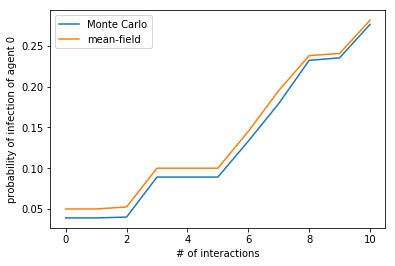

In [298]:
plt.plot(PI[:,0], label="Monte Carlo")
plt.plot(mf_PI[:,0], label="mean-field")
plt.xlabel("# of interactions")
plt.ylabel("probability of infection of agent 0")
plt.legend()

### The mean-field equations yield an upper bound on the risk, due to the no shared histories assumption

## Case 4: Many agents, many interactions, with shared of histories

In [305]:
# Number of agents
params.N = 1000
# Number of interactions
params.M = 100000
# Transmission probability ~ R0/number of interactions while infectious, what constitutes an interaction? closer than 2m for 2minutes indoors? but touching objects ...
params.prob_trans = 0.05 # R0=2/40 interactions 
params.prob_infection_t0 = 0.01
params.num_samples = 99

In [306]:
mc = monte_carlo.MonteCarlo()

In [307]:
mc.interactions

array([[903, 610],
       [742, 499],
       [402, 976],
       ...,
       [235,  69],
       [363, 841],
       [881, 593]])

In [308]:
mc.I0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [309]:
PI, P_samples = mc.run()

100%|██████████| 100000/100000 [00:18<00:00, 5328.49it/s]


In [315]:
agents = [mean_field_agent.Agent(id=i) for i in range(params.N)]
for i in range(0,params.N):
    agents[i].p = params.prob_infection_t0

In [316]:
mf_PI = []
for i1, i2 in tqdm(mc.interactions):
    a = agents[i1]
    b = agents[i2]
    
    msg_a, msg_b = mean_field_agent.start_contact(a, b)    
    # -------
    # Contact ends, and we can compute context & t_exposed
    context = mean_field_agent.ContextObject(t_exposed=0)
    # -------
    mean_field_agent.end_contact(a, b, msg_a, msg_b, context)   

    mf_PI.append([x.p for x in agents])
mf_PI = numpy.array(mf_PI)

100%|██████████| 100000/100000 [00:24<00:00, 4135.36it/s]


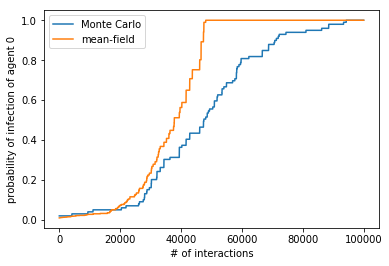

In [318]:
plt.plot(PI[:,0], label="Monte Carlo")
plt.plot(mf_PI[:,0], label="mean-field")
plt.xlabel("# of interactions")
plt.ylabel("probability of infection of agent 0")
plt.legend()